In [1]:
! export PYTHONPATH=../../

In [2]:
from os.path import join, basename
from glob import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
from typing import List, Any

from photometric.estimate_alb_nrm import estimate_alb_nrm

### Utility functions

In [3]:
def show_single_image(img: np.ndarray, figsize=(8, 8), ax=None, show=True, grayscale=False):
    """Displays a single image."""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    args = {"X": img}
    if grayscale:
        args["cmap"] = "gray"

    ax.imshow(**args)
    
    if show:
        plt.show()

In [4]:
def show_multiple_images(
        imgs: List[np.ndarray], grid: tuple = None, figsize=(8, 8), ax=None, grayscale=False, show=False
    ):
    """Displays a set of images based on given grid pattern."""
    assert isinstance(imgs, list)
    assert isinstance(grid, tuple) and len(grid) == 2

    num_imgs = len(imgs)
    if grid is None:
        grid = (1, num_imgs)

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    grid_imgs = [[None for _ in range(grid[1])] for _ in range(grid[0])]
    for i in range(grid[0]):
        for j in range(grid[1]):
            grid_imgs[i][j] = imgs[i * j + j]

    disp_imgs = []
    for i in range(grid[0]):
        disp_imgs.append(np.hstack(grid_imgs[i]))
    disp_imgs = np.vstack(disp_imgs)
    
    args = {"X": disp_imgs}
    if grayscale:
        args["cmap"] = "gray"

    ax.imshow(**args)

    if show:
        plt.show()

### Question 1

**Part 1**

In [5]:
img_folder = "../SphereGray5/"
img_paths = glob(join(img_folder, "*.png"))

In [6]:
# load images
imgs = [cv2.imread(x, 0) / 255.0 for x in img_paths]

# load ligh source directions (angles) from filenames
angs = [basename(x).split(".png")[0].split("_")[1:] for x in img_paths]
angs = np.array(angs).astype(float)

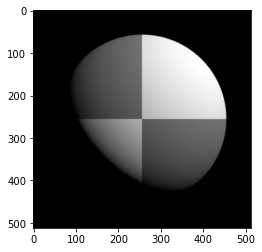

In [7]:
show_single_image(imgs[0], figsize=(4, 4), grayscale=True)

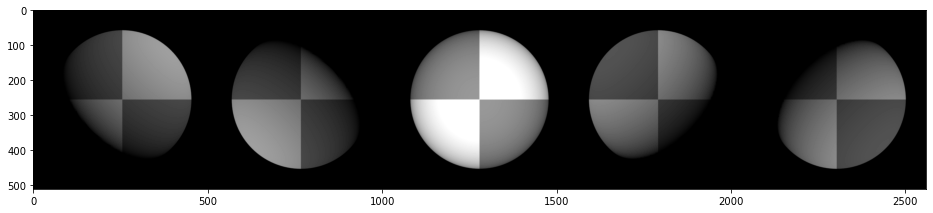

In [8]:
show_multiple_images(imgs, grid=(1, 5), grayscale=True, figsize=(16, 6))

In [9]:
img_stack = np.moveaxis(np.array(imgs), 0, -1)

In [10]:
img_stack.shape

(512, 512, 5)

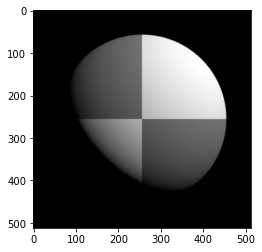

In [11]:
show_single_image(img_stack[:, :, 0], figsize=(4, 4), grayscale=True)

In [12]:
def convert_polar_to_cartesian(theta: np.ndarray, phi: np.ndarray, convert_to_rad=False):
    """Converts (theta, phi) in polar coordinates to cartesian coordinates"""
    # convert in radians
    if convert_to_rad:
        theta = (np.pi * theta) / 180.0
        phi = (np.pi * phi) / 180.0

    # compute x, y, z
    z = np.cos(theta)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)

    return np.array([x, y, z]).T

In [13]:
scriptV = convert_polar_to_cartesian(angs[:, 0], angs[:, 1])

In [14]:
scriptV.shape

(5, 3)

In [15]:
albedo, normal = estimate_alb_nrm(img_stack, scriptV, shadow_trick=False)

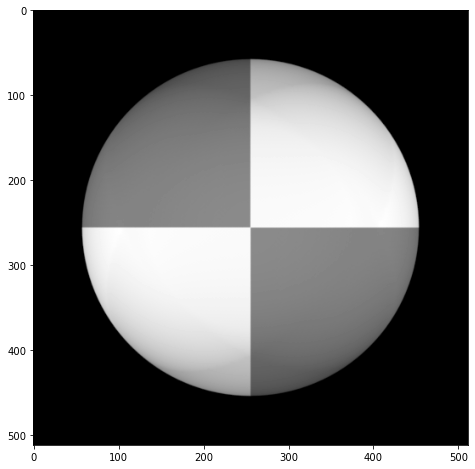

In [16]:
show_single_image(albedo, grayscale=True)

In [17]:
albedo.min(), albedo.max(), normal.min(), normal.max()

(0.0, 0.9031845709120874, -0.8176112495956236, 0.9999999999999998)

In [18]:
albedo, normal = estimate_alb_nrm(img_stack, scriptV, shadow_trick=True)

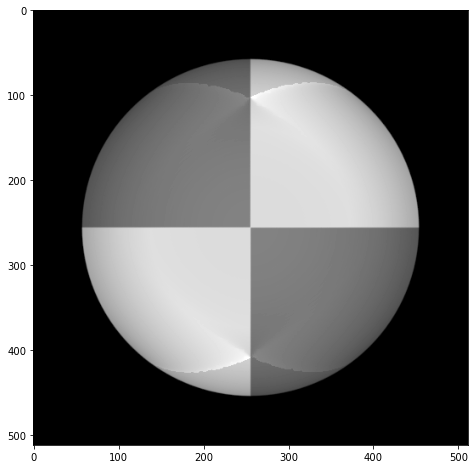

In [19]:
show_single_image(albedo, grayscale=True)

In [20]:
albedo.min(), albedo.max(), normal.min(), normal.max()

(0.0, 1.1199861900349317, -0.9185216503066165, 0.9999999999999998)